# Pearson's $\chi^2$ Test

Is my opponent rolling too many sixes?

Now, time to ask a different question. What if we're not worried about just the number of sixes, but what to ask *"Is the distribution of rolls we get consistent with a fair die?"*

The Pearson's $\chi^2$ test for rolling a die gives

$$ \chi^2 = \sum_{i=1}^{6} \frac{(C_i - E_i)^2}{E_i} $$

It iterates over every possible outcome (1-6) and calculates the Chi2 metric. For each of the outcomes it takes the counts (e.g., how many ones did we roll?) subtracted by the expected number (e.g., expected number of ones, so if you roll a die 600 times, you'd expect 100 if it's fair), the difference is then squared and divided by the expected number (which in a sense, yields a ratio), these are added up for every outcome (1-6) and you get the Chi2 value which follows a Chi2 distribution.

But what does this $\chi^2$ value mean? We can convert it to a probability given the $\chi^2$ distribution, with 5 degrees of freedom (six sides - 1)

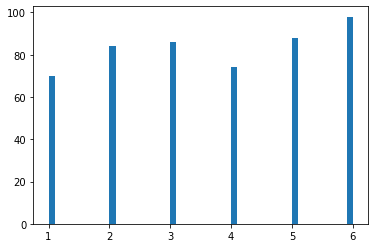

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("loaded_500.txt") # 500 values of numbers from 1 to 6 (shape of (500,))
unique, counts = np.unique(data, return_counts=True)
plt.hist(data, bins=50);

In [2]:
expected = data.size / 6 # Expected for a fair die
chi2_val = np.sum((counts - expected)**2 / expected)
print(chi2_val)

6.112


Our p-value is 0.295


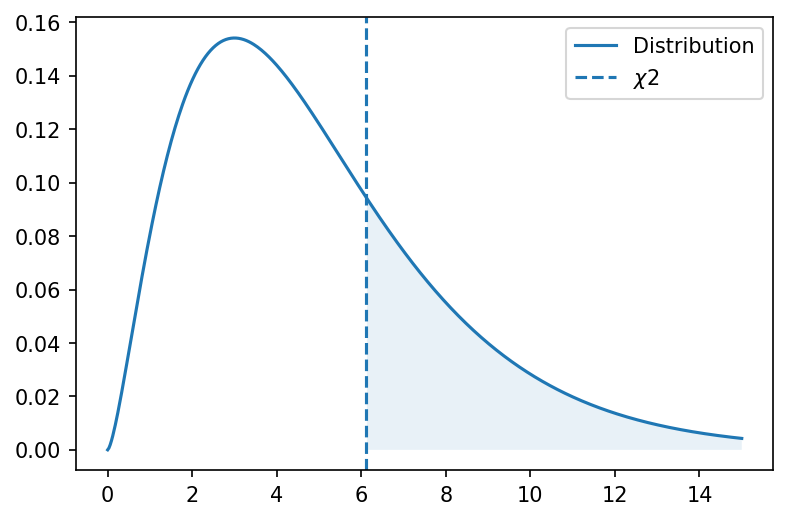

In [11]:
from scipy.stats import chi2
chi2s = np.linspace(0, 15, 500) # 15 used as fine-tuning after knowing the answer...
prob = chi2.pdf(chi2s, 5) # PDF of the Chi2 distribution with 5 degrees of freedom at those values

plt.rcParams['figure.dpi'] = 150
plt.plot(chi2s, prob, label="Distribution")
plt.axvline(chi2_val, label="$\chi2$", ls="--")
plt.fill_between(chi2s, prob, 0, where=(chi2s>=chi2_val), alpha=0.1)
plt.legend();
# We want the area to the right which is the Survival Function
print(f"Our p-value is {chi2.sf(chi2_val, 5):.3f}")

# The shaded area is the probability that represents the p-value
# Remember: the p-value means that what are the chances that our null hypothesis is correct
# If data is more skewed/bias, the vertical line would shift to the right and the area would decrease
# which means that the p-value would get smaller and we'd become more certain that the null hypothesis is wrong

In [13]:
# rather than do this ourselves...
from scipy.stats import chisquare
chisq, p = chisquare(counts, expected)
print(f"We have a chi2 of {chisq:.2f} with a p-value of {p:.3f}")

We have a chi2 of 6.11 with a p-value of 0.295
